# Gender Classification

by Abhishek Chatterjee (abhishekchatterjeejit@gmail.com)

https://imdeepmind.ml

In [0]:
# The dataset is in my google drive
# So this code is for downloading those dataset here in collab

# Load the Drive helper and mount
from google.colab import drive

# This will prompt for authorization.
drive.mount('/content/drive', force_remount=True)

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=email%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdocs.test%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive.photos.readonly%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/drive


In [0]:
# Making a directory data to store the dataset

!mkdir data

# # Copying the dataset from the drive folder

!cp './drive/My Drive/datasets/IMDB WIKI Dataset/imdb_0.zip' ./data/
!cp './drive/My Drive/datasets/IMDB WIKI Dataset/imdb_1.zip' ./data/
!cp './drive/My Drive/datasets/IMDB WIKI Dataset/imdb_2.zip' ./data/
!cp './drive/My Drive/datasets/IMDB WIKI Dataset/imdb_3.zip' ./data/
!cp './drive/My Drive/datasets/IMDB WIKI Dataset/imdb_4.zip' ./data/
!cp './drive/My Drive/datasets/IMDB WIKI Dataset/wiki_0.zip' ./data/

In [0]:
# Installing unzip

!apt-get install unzip

# Unzipping the dataset and saving it into dataset folder
!unzip ./data/imdb_0.zip -d dataset
!unzip ./data/imdb_1.zip -d dataset
!unzip ./data/imdb_2.zip -d dataset
!unzip ./data/imdb_3.zip -d dataset
!unzip ./data/imdb_4.zip -d dataset
!unzip ./data/wiki_0.zip -d dataset

Reading package lists... Done
Building dependency tree       
Reading state information... Done
unzip is already the newest version (6.0-21ubuntu1).
0 upgraded, 0 newly installed, 0 to remove and 7 not upgraded.
Archive:  ./data/imdb_0.zip
  inflating: dataset/imdb_0.csv      
  inflating: dataset/imdb_1.csv      
  inflating: dataset/imdb_2.csv      
  inflating: dataset/imdb_3.csv      
  inflating: dataset/imdb_4.csv      
  inflating: dataset/imdb_5.csv      
  inflating: dataset/imdb_6.csv      
  inflating: dataset/imdb_7.csv      
  inflating: dataset/imdb_8.csv      
  inflating: dataset/imdb_9.csv      
  inflating: dataset/imdb_10.csv     
Archive:  ./data/imdb_1.zip
  inflating: dataset/imdb_11.csv     
  inflating: dataset/imdb_12.csv     
  inflating: dataset/imdb_13.csv     
  inflating: dataset/imdb_14.csv     
  inflating: dataset/imdb_15.csv     
  inflating: dataset/imdb_16.csv     
  inflating: dataset/imdb_17.csv     
  inflating: dataset/imdb_18.csv     
  inflatin

In [0]:
# Importing pandas and numpy for data manapulation

import pandas as pd
import numpy as np

In [0]:
# Currently im just reading 3 datasets

data1 = pd.read_csv('dataset/wiki_0.csv')
data2 = pd.read_csv('dataset/wiki_1.csv')
data3 = pd.read_csv('dataset/wiki_2.csv')
data4 = pd.read_csv('dataset/wiki_3.csv')
data5 = pd.read_csv('dataset/wiki_4.csv')
data6 = pd.read_csv('dataset/wiki_5.csv')
data7 = pd.read_csv('dataset/wiki_6.csv')


# Merging them into one

data = pd.concat([data1, data2, data3, data4, data5, data6, data7])

del data1, data2, data3, data4, data5, data6, data7

In [0]:
# Lets explore the dataset

data.head()

,Unnamed: 0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel4091,pixel4092,pixel4093,pixel4094,pixel4095,pixel4096,dob,photo_taken,gender,name
0,0,64,65,70,50,177,122,92,78,90,...,37,39,39,45,48,43,1981-05-05,2009,male,Sami Jauhojärvi
1,1,143,155,157,165,162,175,166,165,169,...,95,66,58,61,69,54,1925-04-04,1964,male,Dettmar Cramer
2,2,38,54,54,46,51,34,37,25,35,...,115,115,115,115,115,115,1948-07-03,2008,male,Marc Okrand
3,3,47,47,47,47,47,47,47,47,45,...,144,142,142,147,153,156,1971-05-31,2012,female,Diana Damrau
4,4,197,210,218,215,220,206,190,165,143,...,64,48,53,62,69,56,1960-11-09,2012,female,Krista Tippett


In [0]:
print(data.shape)
print(data.columns)

(37013, 4101)
Index(['Unnamed: 0', 'pixel1', 'pixel2', 'pixel3', 'pixel4', 'pixel5',
       'pixel6', 'pixel7', 'pixel8', 'pixel9',
       ...
       'pixel4091', 'pixel4092', 'pixel4093', 'pixel4094', 'pixel4095',
       'pixel4096', 'dob', 'photo_taken', 'gender', 'name'],
      dtype='object', length=4101)


In [0]:
# Manapulating the data

data = data.drop(['Unnamed: 0', 'dob', 'photo_taken', 'name'], axis=1)
X = data.drop(['gender'], axis=1)
y = data['gender']

del data

X = X.values.reshape(-1,64,64,1)
y = pd.get_dummies(y).values

X = X / 255.0

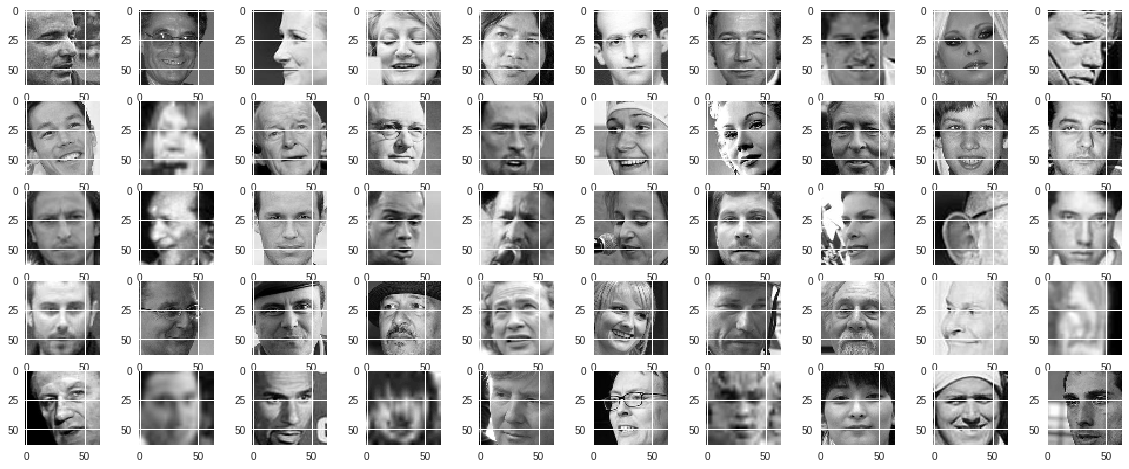

In [0]:
# Lets plot some of the images

import matplotlib.pyplot as plt

w=64
h=64
fig=plt.figure(figsize=(20, 8))
columns = 10
rows = 5
for i in range(1, columns*rows +1):
    img = np.random.randint(10, size=(h,w))
    fig.add_subplot(rows, columns, i)
    plt.imshow(X[i].reshape(w,h), cmap='gray')
plt.show()

In [0]:
# Spliting the dataset into train and test set

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=2)

del X, y

In [0]:
# The main model

from keras.models import Sequential
from keras.layers import Conv2D, MaxPool2D, Dense, Dropout, Flatten
from keras.preprocessing.image import ImageDataGenerator

model = Sequential()

model.add(Conv2D(filters = 32, kernel_size = 3, strides=1, padding='same', activation = 'relu', input_shape = (64,64,1)))

model.add(Conv2D(filters = 32, kernel_size = 3, strides=1, padding='same', activation = 'relu'))

model.add(Conv2D(filters = 32, kernel_size = 3, strides=1, padding='same', activation = 'relu'))

model.add(MaxPool2D(pool_size = 2, strides = 2))

model.add(Conv2D(filters = 64, kernel_size = 3, strides=1, padding='same', activation = 'relu'))

model.add(Conv2D(filters = 64, kernel_size = 3, strides=1, padding='same',activation = 'relu'))

model.add(Conv2D(filters = 64, kernel_size = 3, strides=1, padding='same',activation = 'relu'))

model.add(MaxPool2D(pool_size = 2, strides = 2))

model.add(Dropout(0.33))

model.add(Flatten())
model.add(Dense(units = 512, activation = 'relu'))
model.add(Dense(units = 64, activation = 'relu'))
model.add(Dropout(0.33))
model.add(Dense(units = 2, activation = 'softmax'))


datagen = ImageDataGenerator(
        featurewise_center=False,
        samplewise_center=False,  
        featurewise_std_normalization=False,
        samplewise_std_normalization=False,
        zca_whitening=False,
        rotation_range=10,  
        zoom_range = 0.1, 
        width_shift_range=0.1,  
        height_shift_range=0.1,
        horizontal_flip=False,  
        vertical_flip=False)

datagen.fit(X_train)

model.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])

In [0]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_17 (Conv2D)           (None, 64, 64, 32)        320       
_________________________________________________________________
conv2d_18 (Conv2D)           (None, 64, 64, 32)        9248      
_________________________________________________________________
conv2d_19 (Conv2D)           (None, 64, 64, 32)        9248      
_________________________________________________________________
max_pooling2d_7 (MaxPooling2 (None, 32, 32, 32)        0         
_________________________________________________________________
conv2d_20 (Conv2D)           (None, 32, 32, 64)        18496     
_________________________________________________________________
conv2d_21 (Conv2D)           (None, 32, 32, 64)        36928     
_________________________________________________________________
conv2d_22 (Conv2D)           (None, 32, 32, 64)        36928     
__________

In [0]:
# Training the model

history = model.fit_generator(datagen.flow(X_train, y_train, batch_size=32),
                    validation_data = (X_test,y_test),
                    steps_per_epoch=len(X_train) / 32, epochs=25)

Epoch 1/25
926/925 [==============================] - 51s 55ms/step - loss: 0.5891 - acc: 0.7244 - val_loss: 0.5395 - val_acc: 0.7463
Epoch 2/25
926/925 [==============================] - 49s 53ms/step - loss: 0.5326 - acc: 0.7520 - val_loss: 0.4617 - val_acc: 0.8018
Epoch 3/25
926/925 [==============================] - 49s 53ms/step - loss: 0.4512 - acc: 0.8080 - val_loss: 0.3860 - val_acc: 0.8465
Epoch 4/25
926/925 [==============================] - 49s 53ms/step - loss: 0.3986 - acc: 0.8398 - val_loss: 0.3509 - val_acc: 0.8656
Epoch 5/25
926/925 [==============================] - 49s 53ms/step - loss: 0.3658 - acc: 0.8577 - val_loss: 0.3350 - val_acc: 0.8773
Epoch 6/25
926/925 [==============================] - 49s 53ms/step - loss: 0.3537 - acc: 0.8629 - val_loss: 0.3277 - val_acc: 0.8768
Epoch 7/25
926/925 [==============================] - 49s 53ms/step - loss: 0.3406 - acc: 0.8699 - val_loss: 0.3184 - val_acc: 0.8821
Epoch 8/25
926/925 [==============================] - 49s 53ms

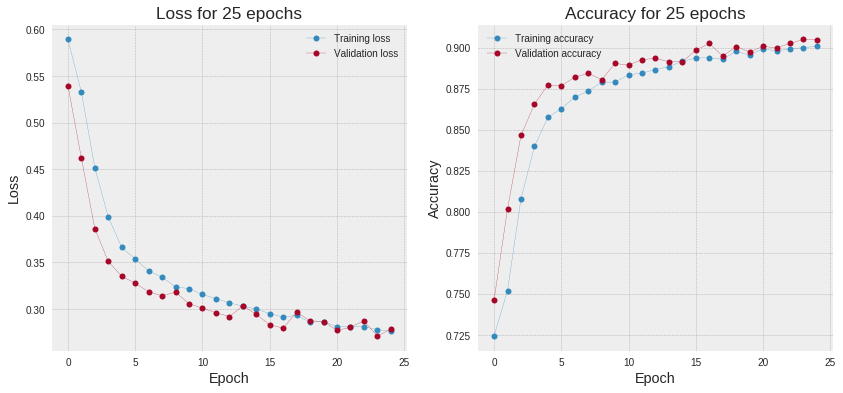

In [0]:
# Plotting the accuracy and loss

hist_df = pd.DataFrame(history.history)

fig = plt.figure(figsize=(14,6))
plt.style.use('bmh')
params_dict = dict(linestyle='solid', linewidth=0.25, marker='o', markersize=6)

plt.subplot(121)
plt.plot(hist_df.loss, label='Training loss', **params_dict)
plt.plot(hist_df.val_loss, label='Validation loss', **params_dict)
plt.title('Loss for ' + str(len(history.epoch)) + ' epochs')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.subplot(122)
plt.plot(hist_df.acc, label='Training accuracy', **params_dict)
plt.plot(hist_df.val_acc, label='Validation accuracy', **params_dict)
plt.title('Accuracy for ' + str(len(history.epoch)) + ' epochs')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()